In [1]:
import pandas as pd

In [2]:
from texas_hold_em_utils.deck import Deck
from texas_hold_em_utils.card import Card
from texas_hold_em_utils.hands import HandOfFive

In [3]:
card_1 = Card().from_str("A", "Hearts")
card_2 = Card().from_str("2", "Hearts")

deck = Deck()
deck.remove(card_1)
deck.remove(card_2)

In [4]:
df = pd.DataFrame(columns=['result', 'my_hand_type', 'opponent_hand_type'])
for i in range(10000):
    round_deck = Deck()
    round_deck.cards = deck.cards.copy()
    round_deck.shuffle()
    opponent_card_1 = round_deck.draw()
    opponent_card_2 = round_deck.draw()
    flop_card_1 = round_deck.draw()
    flop_card_2 = round_deck.draw()
    flop_card_3 = round_deck.draw()
    turn_card = round_deck.draw()
    river_card = round_deck.draw()
    my_hand = HandOfFive([card_1, card_2], [flop_card_1, flop_card_2, flop_card_3, turn_card, river_card])
    opponent_hand = HandOfFive([opponent_card_1, opponent_card_2], [flop_card_1, flop_card_2, flop_card_3, turn_card, river_card])
    my_hand_type = my_hand.get_hand_rank_name()
    opponent_hand_type = opponent_hand.get_hand_rank_name()
    if my_hand > opponent_hand:
        result = 'win'
    elif my_hand < opponent_hand:
        result = 'loss'
    else:
        result = 'tie'
    df = pd.concat([df, pd.DataFrame([[result, my_hand_type, opponent_hand_type]], columns=['result', 'my_hand_type', 'opponent_hand_type'])], ignore_index=True)

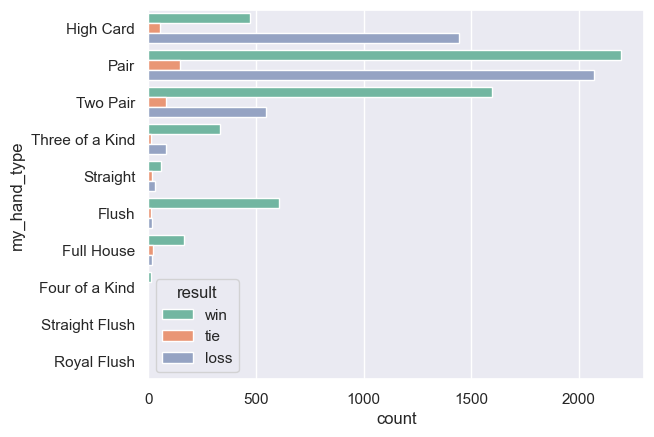

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from texas_hold_em_utils.hands import HAND_TYPE_NAMES

#stacked bar chart of my hand type color by result
sns.set_theme(style="darkgrid")
sns.countplot(y="my_hand_type", hue="result", data=df, palette="Set2", order=HAND_TYPE_NAMES)
plt.show()

So with that Ace/Two suited hand, we lose more than we win when we just get a high card, we're more likely to hit one pair, and when that happens we win slightly more than we lose. If we get 2 pair or better we're really likely to beat a single opponent. Lets see how that changes with a lower top card in our hand...

In [9]:
card_1 = Card().from_str("7", "Hearts")
card_2 = Card().from_str("8", "Hearts")

deck = Deck()
deck.remove(card_1)
deck.remove(card_2)

df = pd.DataFrame(columns=['result', 'my_hand_type', 'opponent_hand_type'])
for i in range(10000):
    round_deck = Deck()
    round_deck.cards = deck.cards.copy()
    round_deck.shuffle()
    opponent_card_1 = round_deck.draw()
    opponent_card_2 = round_deck.draw()
    flop_card_1 = round_deck.draw()
    flop_card_2 = round_deck.draw()
    flop_card_3 = round_deck.draw()
    turn_card = round_deck.draw()
    river_card = round_deck.draw()
    my_hand = HandOfFive([card_1, card_2], [flop_card_1, flop_card_2, flop_card_3, turn_card, river_card])
    opponent_hand = HandOfFive([opponent_card_1, opponent_card_2], [flop_card_1, flop_card_2, flop_card_3, turn_card, river_card])
    my_hand_type = my_hand.get_hand_rank_name()
    opponent_hand_type = opponent_hand.get_hand_rank_name()
    if my_hand > opponent_hand:
        result = 'win'
    elif my_hand < opponent_hand:
        result = 'loss'
    else:
        result = 'tie'
    df = pd.concat([df, pd.DataFrame([[result, my_hand_type, opponent_hand_type]], columns=['result', 'my_hand_type', 'opponent_hand_type'])], ignore_index=True)

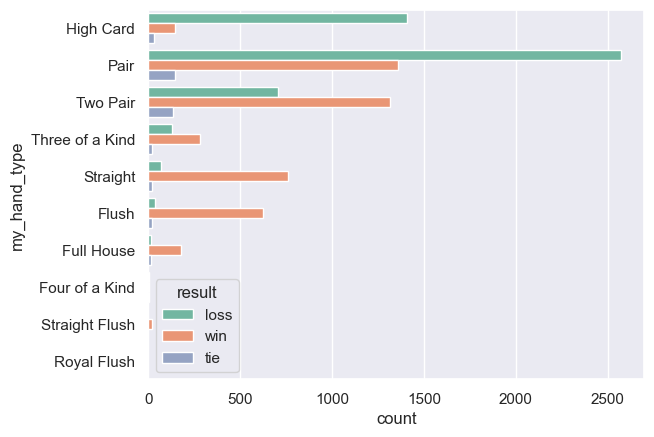

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from texas_hold_em_utils.hands import HAND_TYPE_NAMES

#stacked bar chart of my hand type color by result
sns.set_theme(style="darkgrid")
sns.countplot(y="my_hand_type", hue="result", data=df, palette="Set2", order=HAND_TYPE_NAMES)
plt.show()

With 7/8 suited, if we don't hit a pair we're fucked. Even if we hit a pair we lose twice as often as we win. Two pair or 3 of a kind wins 2/3 times, and past that we're in pretty good shape